# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


#Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    

    response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response['weather'][0]['description']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | hobyo
Processing Record 3 of Set 1 | tagiura
Processing Record 4 of Set 1 | asadabad
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | lompoc
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | vila franca do campo
Processing Record 9 of Set 1 | warren
Processing Record 10 of Set 1 | nemuro
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | udachny
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | okakarara
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | mata-utu
Processing Record 18 of Set 1 | huangpi
Processing Record 19 of Set 1 | prince rupert
Processing Record 20 of Set 1 | siwa oasis
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | por

Processing Record 40 of Set 4 | kintampo
Processing Record 41 of Set 4 | ouadda
Processing Record 42 of Set 4 | cururupu
Processing Record 43 of Set 4 | lyuban'
Processing Record 44 of Set 4 | nar'yan-mar
Processing Record 45 of Set 4 | labytnangi
Processing Record 46 of Set 4 | springbok
Processing Record 47 of Set 4 | mount pearl
Processing Record 48 of Set 4 | keflavik
Processing Record 49 of Set 4 | mazatlan
Processing Record 0 of Set 5 | ust'-ilimsk
Processing Record 1 of Set 5 | hayma'
City not found. Skipping...
Processing Record 2 of Set 5 | whitehorse
Processing Record 3 of Set 5 | ta`u
Processing Record 4 of Set 5 | ylitornio
Processing Record 5 of Set 5 | tikaitnagar
Processing Record 6 of Set 5 | belaya kholunitsa
Processing Record 7 of Set 5 | alik ghund
Processing Record 8 of Set 5 | puerto rico
Processing Record 9 of Set 5 | dudinka
Processing Record 10 of Set 5 | sarangani
Processing Record 11 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 12

Processing Record 31 of Set 8 | katsuura
Processing Record 32 of Set 8 | chokwe
Processing Record 33 of Set 8 | acapulco de juarez
Processing Record 34 of Set 8 | ushtobe
Processing Record 35 of Set 8 | mejit
Processing Record 36 of Set 8 | sao miguel do araguaia
Processing Record 37 of Set 8 | vila velha
Processing Record 38 of Set 8 | neiafu
Processing Record 39 of Set 8 | altay
Processing Record 40 of Set 8 | zhangye
Processing Record 41 of Set 8 | bafra
Processing Record 42 of Set 8 | labrador city
Processing Record 43 of Set 8 | aldan
Processing Record 44 of Set 8 | ironwood
Processing Record 45 of Set 8 | onega
Processing Record 46 of Set 8 | ati
Processing Record 47 of Set 8 | hadibu
Processing Record 48 of Set 8 | aasiaat
Processing Record 49 of Set 8 | ambon
Processing Record 0 of Set 9 | pretoria
Processing Record 1 of Set 9 | nagqu
Processing Record 2 of Set 9 | jizzax
Processing Record 3 of Set 9 | melfi
Processing Record 4 of Set 9 | rovnoye
Processing Record 5 of Set 9 | 

Processing Record 25 of Set 12 | bermeo
Processing Record 26 of Set 12 | truro
Processing Record 27 of Set 12 | kolosovka
Processing Record 28 of Set 12 | tateyama
Processing Record 29 of Set 12 | haiku-pauwela
Processing Record 30 of Set 12 | tangalle
Processing Record 31 of Set 12 | le creusot
Processing Record 32 of Set 12 | ingeniero jacobacci
Processing Record 33 of Set 12 | steinbach
Processing Record 34 of Set 12 | orkney
Processing Record 35 of Set 12 | nabire
Processing Record 36 of Set 12 | shangri-la
City not found. Skipping...
Processing Record 37 of Set 12 | maryborough
Processing Record 38 of Set 12 | mahdia
Processing Record 39 of Set 12 | lagunillas
Processing Record 40 of Set 12 | ad dindar
Processing Record 41 of Set 12 | kolpny
Processing Record 42 of Set 12 | monteagudo
Processing Record 43 of Set 12 | tommot
Processing Record 44 of Set 12 | eilat
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#convert kelvin to fahrenheit
city_data_df['Max Temp'] = (city_data_df['Max Temp'] -273.15) * 1.8

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,8.874,66,92,14.46,TF,1706483964
1,hobyo,5.3505,48.5268,46.908,82,70,4.60,SO,1706483964
2,tagiura,32.8817,13.3506,26.784,72,9,5.42,LY,1706483964
3,asadabad,34.7824,48.1185,-1.854,87,56,1.74,IR,1706483964
4,lompoc,34.6391,-120.4579,48.744,33,0,4.63,US,1706483965


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,8.874,66,92,14.46,TF,1706483964
1,hobyo,5.3505,48.5268,46.908,82,70,4.60,SO,1706483964
2,tagiura,32.8817,13.3506,26.784,72,9,5.42,LY,1706483964
3,asadabad,34.7824,48.1185,-1.854,87,56,1.74,IR,1706483964
4,lompoc,34.6391,-120.4579,48.744,33,0,4.63,US,1706483965


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [20]:
def convert_to_date(utx):
    return datetime.fromtimestamp(utx)

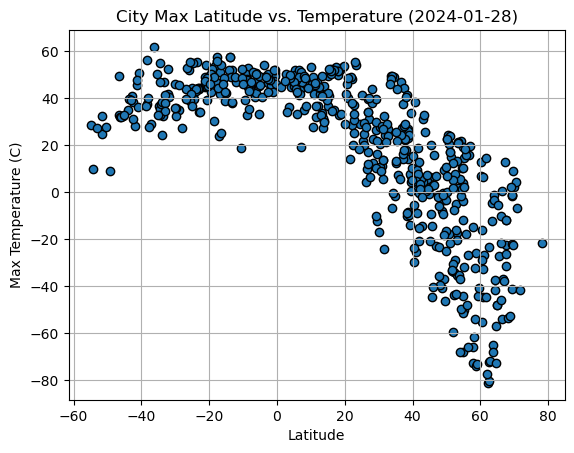

In [27]:
# Build scatter plot for latitude vs. temperature
first = plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

#format date for chart title
date = convert_to_date(city_data_df['Date'].iloc[0])

#this had to be converted to datetime before this would work
date = date.strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()


# # Save the figure
plt.savefig("output_data/Fig1.png")

# # Show plot
plt.show()

#### Latitude Vs. Humidity

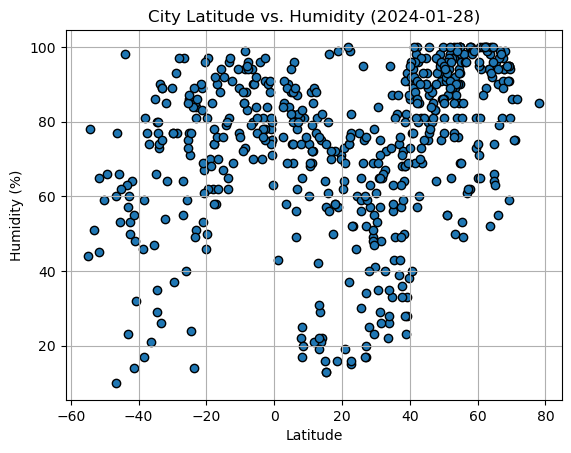

In [28]:
# Build the scatter plots for latitude vs. humidity
second = plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

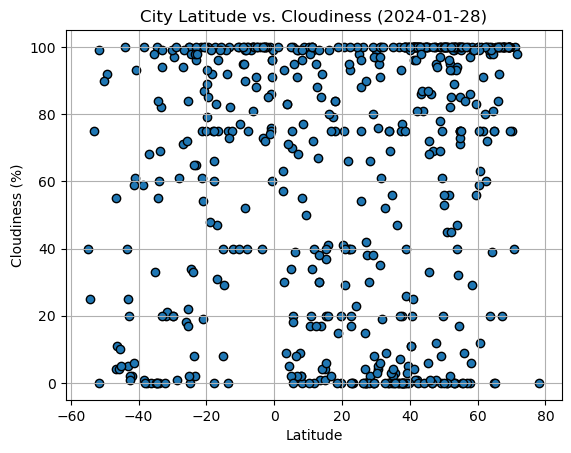

In [29]:
# Build the scatter plots for latitude vs. cloudiness
third = plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

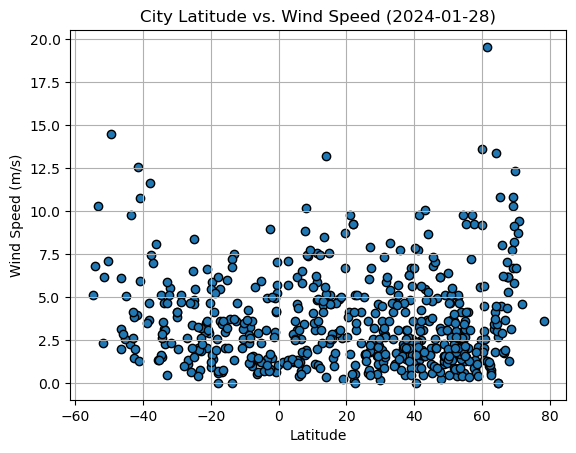

In [30]:
# Build the scatter plots for latitude vs. wind speed
fourth = plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def LinearRegression(x_values, y_values):
    (slope,intercept,rvalue,pvalue,stderr) =linregress(x_values, y_values)
    return [slope,intercept,rvalue,pvalue,stderr]

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hobyo,5.3505,48.5268,46.908,82,70,4.60,SO,1706483964
2,tagiura,32.8817,13.3506,26.784,72,9,5.42,LY,1706483964
3,asadabad,34.7824,48.1185,-1.854,87,56,1.74,IR,1706483964
4,lompoc,34.6391,-120.4579,48.744,33,0,4.63,US,1706483965
6,vila franca do campo,37.7167,-25.4333,22.014,68,77,1.41,PT,1706483965


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,8.874,66,92,14.46,TF,1706483964
5,papatowai,-46.5619,169.4708,32.508,60,4,2.00,NZ,1706483965
9,grytviken,-54.2811,-36.5092,9.846,78,25,6.81,GS,1706483966
10,margaret river,-33.9500,115.0667,23.994,73,60,3.11,AU,1706483966
12,port alfred,-33.5906,26.8910,32.184,90,69,3.10,ZA,1706483966


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7797288548229564


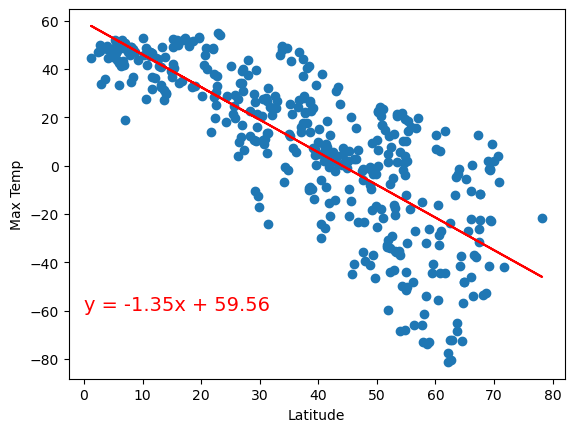

In [34]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


#get the linear regression variables
(slope,intercept,rvalue,pvalue,stderr) = LinearRegression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

#linear regression model
regress_values = northern_hemi_df["Lat"] * slope + intercept

#model equation
plt.text(0,-60, "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)),fontsize=14,color="red")

#plot linear regression
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

print(f"The r-value is: {rvalue}")

The r-value is: 0.4916274337002632


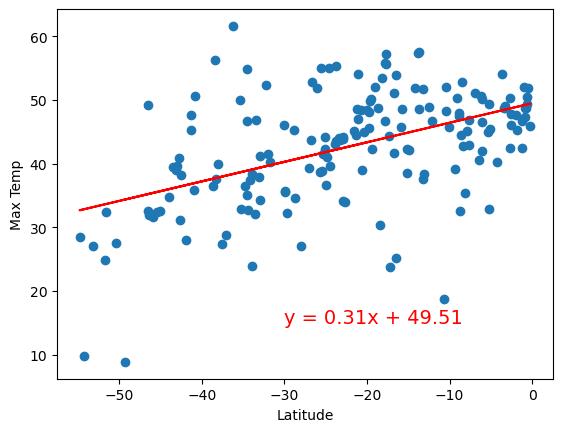

In [35]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


#get the linear regression variables
(slope,intercept,rvalue,pvalue,stderr) = LinearRegression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

#linear regression model
regress_values = southern_hemi_df["Lat"] * slope + intercept

#model equation
plt.text(-30,15, "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)),fontsize=14,color="red")

#plot linear regression
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** The Northern Hemisphere has a semi-strong negative correlation regarding latitude and max temperature in that, the closer the latitude is to 0 the higher the temperature however, the further you move away from the equator the max temperature drops.  As far as the Southern Hemisphere is concerned, there is a weak correlation between latitude and max temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4413720903750969


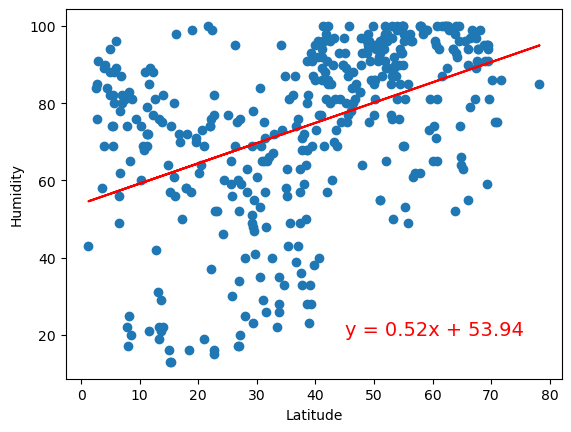

In [36]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")


#get the linear regression variables
(slope,intercept,rvalue,pvalue,stderr) = LinearRegression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

#linear regression model
regress_values = northern_hemi_df["Lat"] * slope + intercept

#model equation
plt.text(45,20, "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)),fontsize=14,color="red")

#plot linear regression
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

print(f"The r-value is: {rvalue}")

The r-value is: 0.48920076619924646


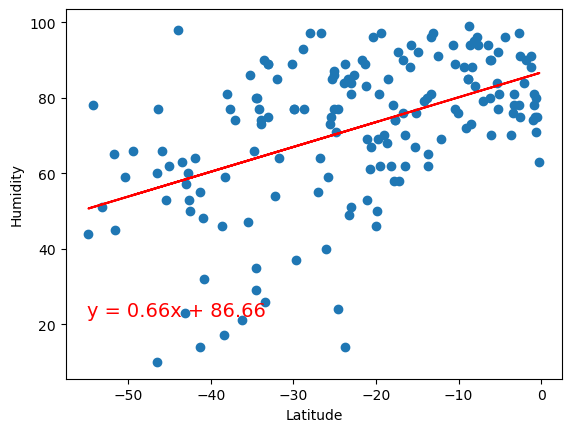

In [37]:
#Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")


#get the linear regression variables
(slope,intercept,rvalue,pvalue,stderr) = LinearRegression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

#linear regression model
regress_values = southern_hemi_df["Lat"] * slope + intercept

#model equation
plt.text(-55,22, "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)),fontsize=14,color="red")

#plot linear regression
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** Both the hemispheres show a weak positive correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2707829531219217


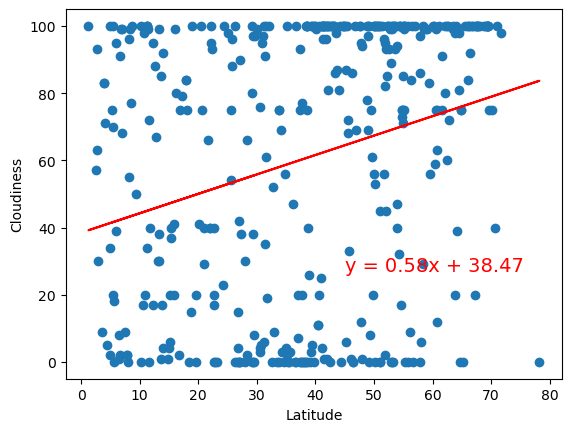

In [38]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


#get the linear regression variables
(slope,intercept,rvalue,pvalue,stderr) = LinearRegression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

#linear regression model
regress_values = northern_hemi_df["Lat"] * slope + intercept

#model equation
plt.text(45,27, "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)),fontsize=14,color="red")

#plot linear regression
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

print(f"The r-value is: {rvalue}")

The r-value is: 0.4867848100127097


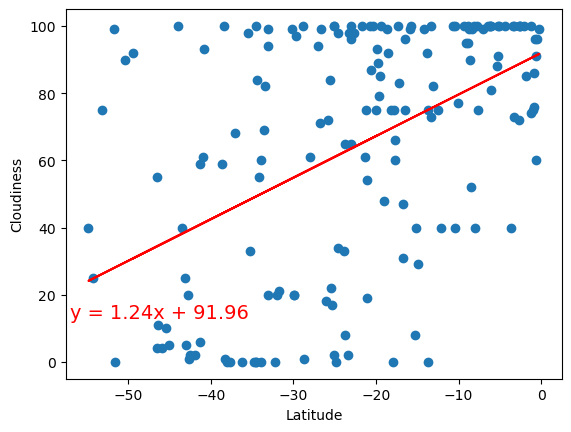

In [39]:
#Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


#get the linear regression variables
(slope,intercept,rvalue,pvalue,stderr) = LinearRegression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

#linear regression model
regress_values = southern_hemi_df["Lat"] * slope + intercept

#model equation
plt.text(-57,13, "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)),fontsize=14,color="red")

#plot linear regression
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** Both hemispheres have very little positive correlation between latitude and cloudiness.  The northern hemisphere has clusters around cloudiness of 100 and at 0.  Besides those 2 situations the data seems to be very spread out.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06428494811715352


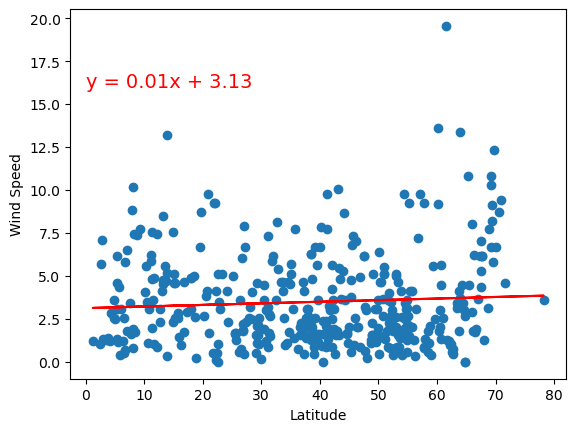

In [40]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


#get the linear regression variables
(slope,intercept,rvalue,pvalue,stderr) = LinearRegression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

#linear regression model
regress_values = northern_hemi_df["Lat"] * slope + intercept

#model equation
plt.text(0,16, "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)),fontsize=14,color="red")

#plot linear regression
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

print(f"The r-value is: {rvalue}")

The r-value is: -0.31670662598068516


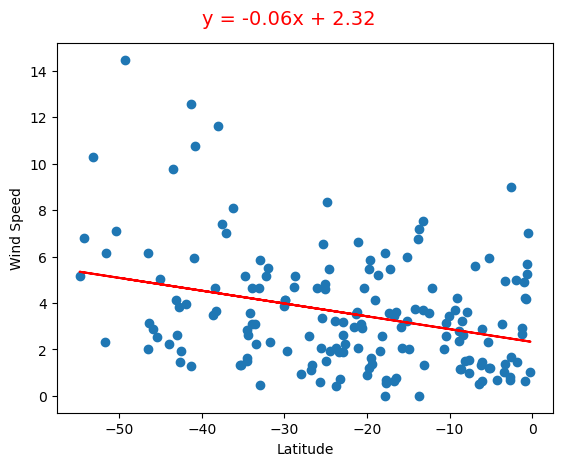

In [41]:
#Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


#get the linear regression variables
(slope,intercept,rvalue,pvalue,stderr) = LinearRegression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

#linear regression model
regress_values = southern_hemi_df["Lat"] * slope + intercept

#model equation
plt.text(-40,16, "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)),fontsize=14,color="red")

#plot linear regression
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** The southern hemisphere has a weak negative correlation between speed and latitude.  The northern hemisphere has almost a 0 r-value which means that there is essentially no correlation at all between latitude and wind speed.